In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Load the dataset
df = pd.read_csv('df_like_real.csv')
df.head()

,Patient ID,Pickup Location,Dropoff Location,Appointment Time,Medical Conditions
0,1,"(28.43340643775268, 77.13138722372226)","(28.462880966624688, 77.03950512512215)",18:00:00,Heart Disease
1,2,"(28.44928965130358, 77.0191069469172)","(28.53360133587291, 77.1860128834832)",16:00:00,Asthma
2,3,"(28.451872087050404, 77.12603335821352)","(28.457746410467998, 77.11396318545778)",16:00:00,Heart Disease
3,4,"(28.545497735582117, 76.95032705102054)","(28.462880966624688, 77.03950512512215)",13:30:00,Diabetes
4,5,"(28.564781627009793, 77.08259851795242)","(28.462880966624688, 77.03950512512215)",17:30:00,Diabetes


In [19]:
df.sample(10)

,Patient ID,Pickup Location,Dropoff Location,Appointment Time,Medical Conditions
34,35,"(28.530821116953792, 76.97487421660372)","(28.43555614069404, 77.098587076673)",15:00:00,Diabetes
98,99,"(28.549644322009367, 77.04520936303788)","(28.406931385240483, 76.97213300762446)",17:00:00,Asthma
84,85,"(28.434471449244786, 77.07382104140882)","(28.52414870704579, 77.05827618427992)",18:00:00,Asthma
33,34,"(28.559657235024986, 77.12503467052875)","(28.457746410467998, 77.11396318545778)",11:30:00,Diabetes
72,73,"(28.439191970408245, 76.97581434080396)","(28.539582822862126, 76.96781357086144)",18:30:00,Asthma
96,97,"(28.490249873446242, 77.02737207545754)","(28.439608545703443, 77.1824967750929)",14:00:00,Heart Disease
5,6,"(28.52568703713917, 77.03810685747293)","(28.491604580920107, 77.15777213278984)",15:30:00,Diabetes
40,41,"(28.42429819708921, 77.0527807209159)","(28.539582822862126, 76.96781357086144)",13:00:00,Asthma
10,11,"(28.401308567790146, 77.07107568177008)","(28.462880966624688, 77.03950512512215)",18:00:00,Heart Disease
82,83,"(28.52776870934815, 77.0782289373437)","(28.439608545703443, 77.1824967750929)",10:30:00,Diabetes


In [20]:
# Function to calculate travel time based on coordinates (assuming constant speed)
def calculate_travel_time(coord1, coord2, speed=30):
    distance = geodesic(coord1, coord2).kilometers
    return distance / speed * 60  # Convert to minutes

# Ensure coordinates are in tuple format
def parse_coordinates(coord_str):
    return tuple(map(float, coord_str.strip("()").split(",")))

# Apply the parsing function if needed
if isinstance(df['Pickup Location'][0], str):
    df['Pickup Location'] = df['Pickup Location'].apply(parse_coordinates)
    df['Dropoff Location'] = df['Dropoff Location'].apply(parse_coordinates)

# Calculate travel time
df['Travel Time'] = df.apply(lambda row: calculate_travel_time(row['Pickup Location'], row['Dropoff Location']), axis=1)

# Display the first few rows of the dataframe
df.head()

,Patient ID,Pickup Location,Dropoff Location,Appointment Time,Medical Conditions,Travel Time
0,1,"(28.43340643775268, 77.13138722372226)","(28.462880966624688, 77.03950512512215)",18:00:00,Heart Disease,19.148992
1,2,"(28.44928965130358, 77.0191069469172)","(28.53360133587291, 77.1860128834832)",16:00:00,Asthma,37.649709
2,3,"(28.451872087050404, 77.12603335821352)","(28.457746410467998, 77.11396318545778)",16:00:00,Heart Disease,2.699255
3,4,"(28.545497735582117, 76.95032705102054)","(28.462880966624688, 77.03950512512215)",13:30:00,Diabetes,25.302881
4,5,"(28.564781627009793, 77.08259851795242)","(28.462880966624688, 77.03950512512215)",17:30:00,Diabetes,24.111153


In [21]:
import folium
# Plot Pickup and Dropoff locations on a map
# Create a map centered on Gurugram
gurugram_center = [28.4595, 77.0266]  # Approximate center of Gurugram
m = folium.Map(location=gurugram_center, zoom_start=12)

# Add markers for pickup locations
for idx, row in df.iterrows():
    folium.Marker(location=row['Pickup Location'], popup=f"Pickup: {row['Patient ID']}").add_to(m)

# Add markers for dropoff locations
for idx, row in df.iterrows():
    folium.Marker(location=row['Dropoff Location'], popup=f"Dropoff: {row['Patient ID']}", icon=folium.Icon(color='red')).add_to(m)

# Save map to an HTML file
m.save('gurugram_map.html')

In [22]:
import numpy as np
import folium
from sklearn.cluster import KMeans

# Perform K-Means clustering on pickup locations
pickup_locations = np.array(df['Pickup Location'].tolist())
kmeans = KMeans(n_clusters=3, random_state=0).fit(pickup_locations)
df['Cluster_with_patients'] = kmeans.labels_

# Plot the results
colors = ['blue', 'green', 'pink']

# Create a map centered on Gurugram
gurugram_center = [28.4595, 77.0266]  # Approximate center of Gurugram
m = folium.Map(location=gurugram_center, zoom_start=12)

# Add markers for pickup and dropoff locations
for idx, row in df.iterrows():
    pickup_marker = folium.Marker(location=row['Pickup Location'],
                                  popup=f"Pickup: {row['Patient ID']}",
                                  icon=folium.Icon(color=colors[row['Cluster_with_patients']]))
    dropoff_marker = folium.Marker(location=row['Dropoff Location'],
                                   popup=f"Dropoff: {row['Patient ID']}",
                                   icon=folium.Icon(color='red'))
    pickup_marker.add_to(m)
    dropoff_marker.add_to(m)

# Display map
m.save('gurugram_map_with_clusters.html')

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Encode 'Medical Conditions' column
label_encoder = LabelEncoder()
df['Medical Conditions Encoded'] = label_encoder.fit_transform(df['Medical Conditions'])
df.head()

,Patient ID,Pickup Location,Dropoff Location,Appointment Time,Medical Conditions,Travel Time,Cluster_with_patients,Medical Conditions Encoded
0,1,"(28.43340643775268, 77.13138722372226)","(28.462880966624688, 77.03950512512215)",18:00:00,Heart Disease,19.148992,1,2
1,2,"(28.44928965130358, 77.0191069469172)","(28.53360133587291, 77.1860128834832)",16:00:00,Asthma,37.649709,0,0
2,3,"(28.451872087050404, 77.12603335821352)","(28.457746410467998, 77.11396318545778)",16:00:00,Heart Disease,2.699255,1,2
3,4,"(28.545497735582117, 76.95032705102054)","(28.462880966624688, 77.03950512512215)",13:30:00,Diabetes,25.302881,2,1
4,5,"(28.564781627009793, 77.08259851795242)","(28.462880966624688, 77.03950512512215)",17:30:00,Diabetes,24.111153,2,1


In [24]:
df.head(5)

,Patient ID,Pickup Location,Dropoff Location,Appointment Time,Medical Conditions,Travel Time,Cluster_with_patients,Medical Conditions Encoded
0,1,"(28.43340643775268, 77.13138722372226)","(28.462880966624688, 77.03950512512215)",18:00:00,Heart Disease,19.148992,1,2
1,2,"(28.44928965130358, 77.0191069469172)","(28.53360133587291, 77.1860128834832)",16:00:00,Asthma,37.649709,0,0
2,3,"(28.451872087050404, 77.12603335821352)","(28.457746410467998, 77.11396318545778)",16:00:00,Heart Disease,2.699255,1,2
3,4,"(28.545497735582117, 76.95032705102054)","(28.462880966624688, 77.03950512512215)",13:30:00,Diabetes,25.302881,2,1
4,5,"(28.564781627009793, 77.08259851795242)","(28.462880966624688, 77.03950512512215)",17:30:00,Diabetes,24.111153,2,1


In [25]:
import numpy as np
# Perform K-Means clustering on pickup locations
pickup_locations = np.array(df['Pickup Location'].tolist())
kmeans = KMeans(n_clusters=5, random_state=0).fit(pickup_locations)
df['Cluster_with_time&Condition'] = kmeans.labels_
# Plot the results
colors = ['blue', 'green','pink','orange','beige']
# Create a map centered on Gurugram
gurugram_center = [28.4595, 77.0266]  # Approximate center of Gurugram
m = folium.Map(location=gurugram_center, zoom_start=12)

# Add markers for pickup and dropoff locations
for idx, row in df.iterrows():
    pickup_marker = folium.Marker(location=row['Pickup Location'],
                                  popup=f"Pickup: {row['Patient ID']}",
                                  icon=folium.Icon(color=colors[row['Cluster_with_time&Condition']]))
    dropoff_marker = folium.Marker(location=row['Dropoff Location'],
                                   popup=f"Dropoff: {row['Patient ID']}",
                                   icon=folium.Icon(color='red'))
    pickup_marker.add_to(m)
    dropoff_marker.add_to(m)

# Save map to an HTML file
m.save('gurugram_map_with_clusters2.html')

In [26]:
df.head()

,Patient ID,Pickup Location,Dropoff Location,Appointment Time,Medical Conditions,Travel Time,Cluster_with_patients,Medical Conditions Encoded,Cluster_with_time&Condition
0,1,"(28.43340643775268, 77.13138722372226)","(28.462880966624688, 77.03950512512215)",18:00:00,Heart Disease,19.148992,1,2,4
1,2,"(28.44928965130358, 77.0191069469172)","(28.53360133587291, 77.1860128834832)",16:00:00,Asthma,37.649709,0,0,0
2,3,"(28.451872087050404, 77.12603335821352)","(28.457746410467998, 77.11396318545778)",16:00:00,Heart Disease,2.699255,1,2,4
3,4,"(28.545497735582117, 76.95032705102054)","(28.462880966624688, 77.03950512512215)",13:30:00,Diabetes,25.302881,2,1,3
4,5,"(28.564781627009793, 77.08259851795242)","(28.462880966624688, 77.03950512512215)",17:30:00,Diabetes,24.111153,2,1,2


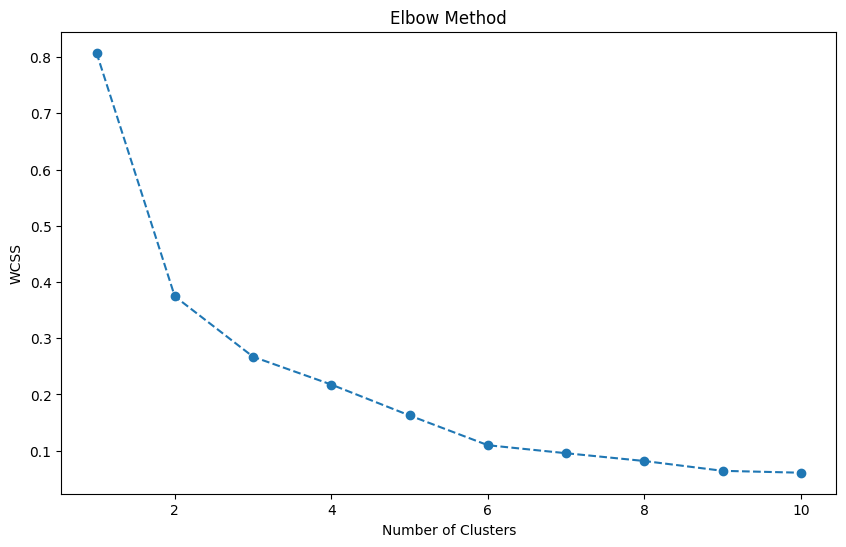

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming pickup_locations is a numpy array of pickup locations
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pickup_locations)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

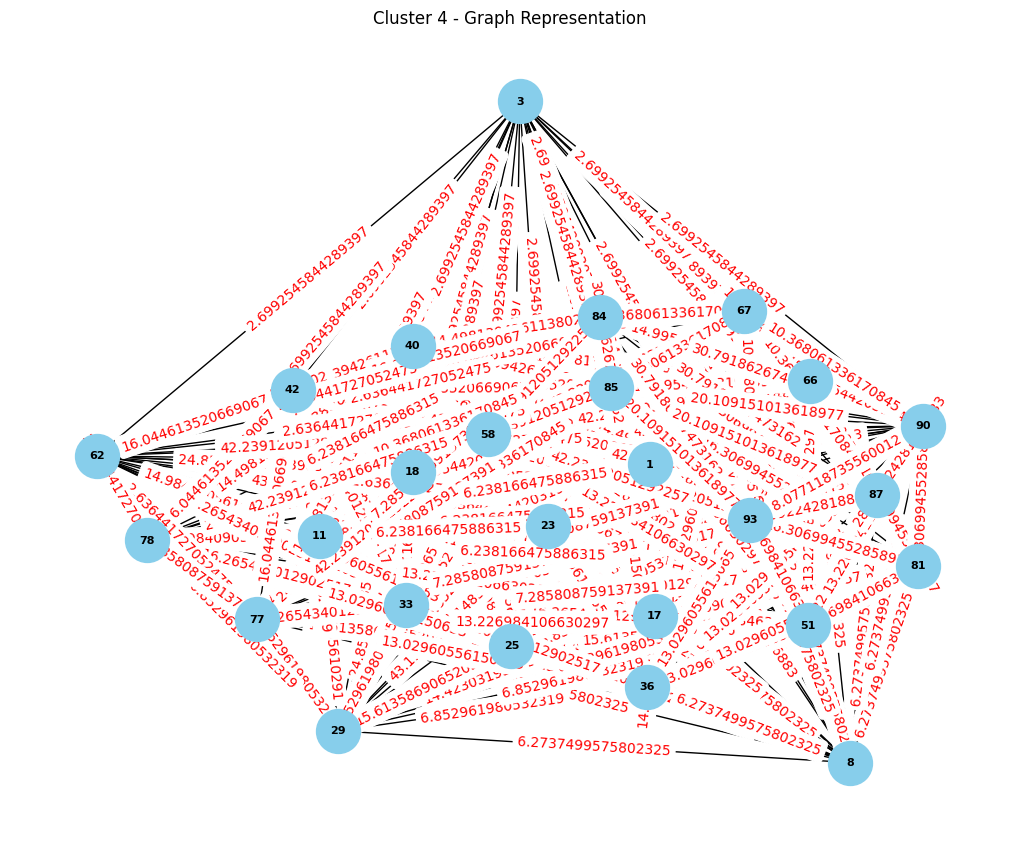

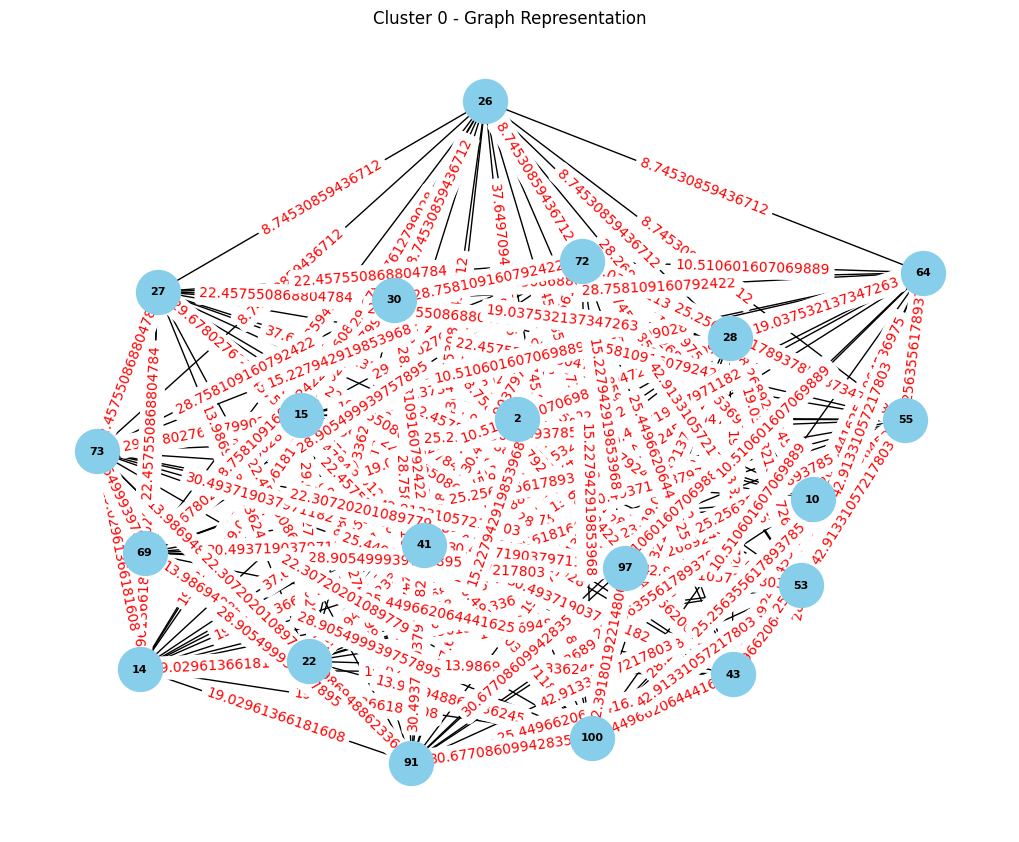

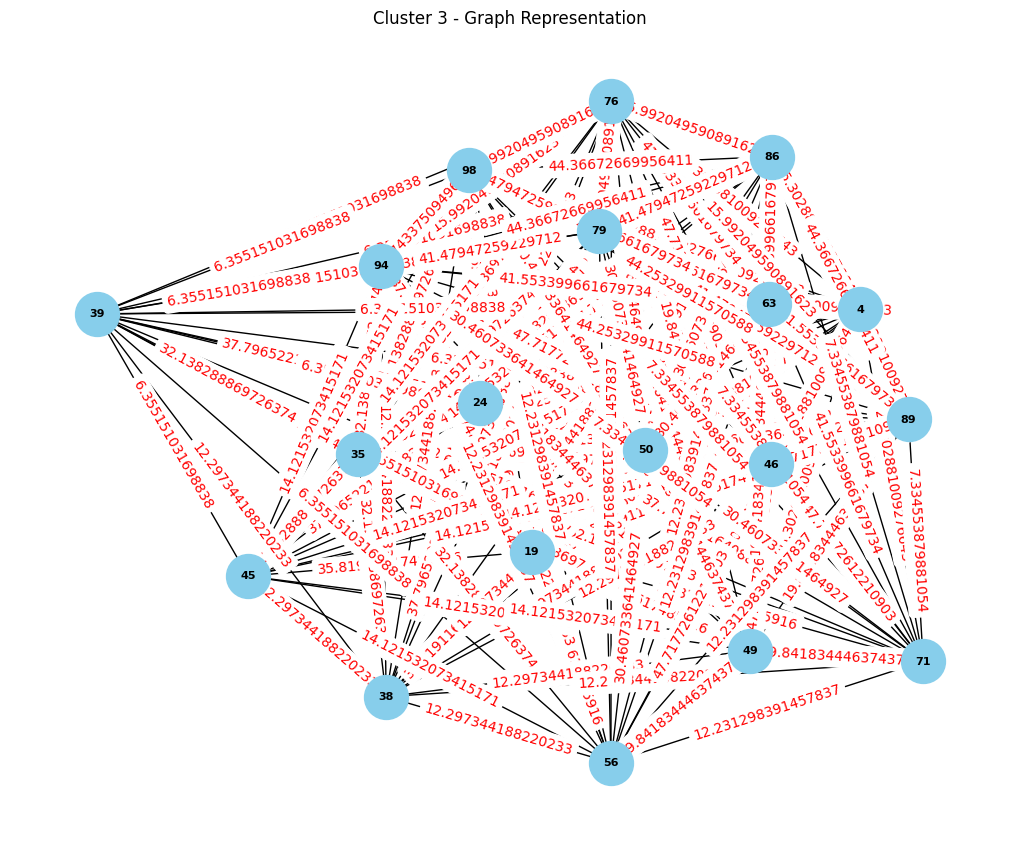

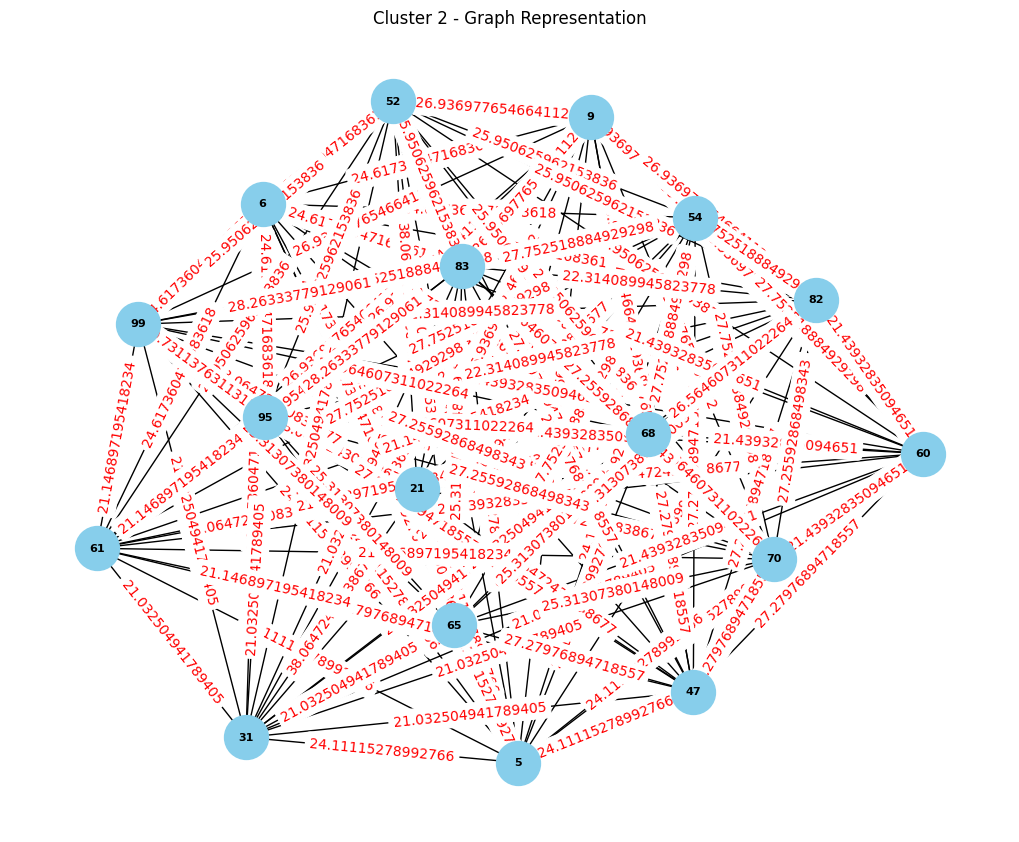

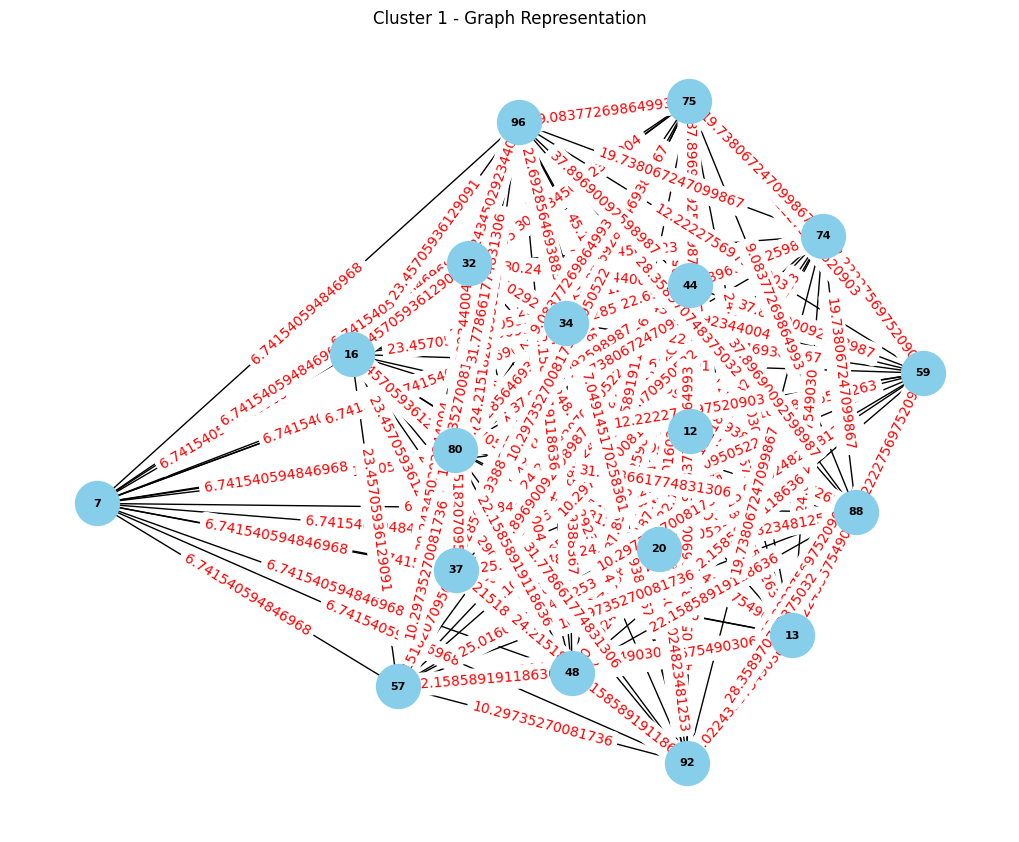

In [28]:
import networkx as nx
# Graph Based
import matplotlib.pyplot as plt

def create_and_visualize_cluster_graph(cluster_df, cluster_label):
    G = nx.Graph()
    
    # Add nodes
    for index, row in cluster_df.iterrows():
        G.add_node(row['Patient ID'], data=row)
    
    # Add edges with weights
    for i in range(len(cluster_df)):
        for j in range(i + 1, len(cluster_df)):
            travel_time = calculate_travel_time(cluster_df.iloc[i]['Pickup Location'], cluster_df.iloc[i]['Dropoff Location']
                                              )
            G.add_edge(cluster_df.iloc[i]['Patient ID'], cluster_df.iloc[j]['Patient ID'], weight=travel_time)
    
    # Plot the graph with improved layout and node sizes
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  # Set seed for reproducibility
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=8, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title(f"Cluster {cluster_label} - Graph Representation")
    plt.show()
    
    return G

# Iterate over each cluster and create the graph
for cluster_label in df['Cluster_with_time&Condition'].unique():
    cluster_df = df[df['Cluster_with_time&Condition'] == cluster_label]
    G = create_and_visualize_cluster_graph(cluster_df, cluster_label)


In [29]:
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist
# Graph-based matching within each cluster
def match_patients_within_cluster(cluster_df):
    n = len(cluster_df)
    if n < 2:
        return []
    
    # Calculate pairwise travel times
    locations = np.array(list(cluster_df['Pickup Location']) + list(cluster_df['Dropoff Location']))
    distance_matrix = cdist(locations, locations, metric='euclidean')
    travel_times = distance_matrix[:n, n:]
    
    # Apply Hungarian algorithm
    row_ind, col_ind = linear_sum_assignment(travel_times)
    
    matched_pairs = [(cluster_df.iloc[row]['Patient ID'], cluster_df.iloc[col]['Patient ID']) for row, col in zip(row_ind, col_ind)]
    return matched_pairs

# Apply the matching algorithm to each cluster
clusters = df['Cluster_with_time&Condition'].unique()
ride_groups = []

for cluster in clusters:
    cluster_df = df[df['Cluster_with_time&Condition'] == cluster]
    ride_groups.extend(match_patients_within_cluster(cluster_df))

# Output the ride groups
ride_groups

[(1, 62),
 (3, 25),
 (8, 18),
 (11, 42),
 (17, 36),
 (18, 17),
 (23, 66),
 (25, 51),
 (29, 81),
 (33, 8),
 (36, 77),
 (40, 85),
 (42, 29),
 (51, 58),
 (58, 84),
 (62, 90),
 (66, 78),
 (67, 1),
 (77, 11),
 (78, 67),
 (81, 23),
 (84, 33),
 (85, 87),
 (87, 93),
 (90, 3),
 (93, 40),
 (2, 30),
 (10, 28),
 (14, 43),
 (15, 26),
 (22, 53),
 (26, 10),
 (27, 14),
 (28, 64),
 (30, 97),
 (41, 22),
 (43, 55),
 (53, 41),
 (55, 91),
 (64, 2),
 (69, 15),
 (72, 73),
 (73, 72),
 (91, 100),
 (97, 69),
 (100, 27),
 (4, 39),
 (19, 35),
 (24, 46),
 (35, 38),
 (38, 24),
 (39, 56),
 (45, 94),
 (46, 50),
 (49, 76),
 (50, 89),
 (56, 98),
 (63, 45),
 (71, 86),
 (76, 49),
 (79, 19),
 (86, 63),
 (89, 71),
 (94, 79),
 (98, 4),
 (5, 65),
 (6, 54),
 (9, 5),
 (21, 70),
 (31, 60),
 (47, 82),
 (52, 52),
 (54, 83),
 (60, 99),
 (61, 9),
 (65, 95),
 (68, 31),
 (70, 61),
 (82, 21),
 (83, 68),
 (95, 47),
 (99, 6),
 (7, 92),
 (12, 59),
 (13, 96),
 (16, 37),
 (20, 7),
 (32, 12),
 (34, 80),
 (37, 57),
 (44, 16),
 (48, 48),
 (57

In [30]:
# Define a function to calculate the total travel time for a ride group
def calculate_total_travel_time(group, df):
    total_time = 0
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            loc1 = df[df['Patient ID'] == group[i]]['Pickup Location'].values[0]
            loc2 = df[df['Patient ID'] == group[j]]['Dropoff Location'].values[0]
            total_time += calculate_travel_time(loc1, loc2)
    return total_time

# Create ride groups and calculate total travel time for each group
# ride_groups = [(1, 62), (3, 25), (8, 18), (11, 42), (17, 36), (18, 17)]
ride_group_times = []

for group in ride_groups:
    total_travel_time = calculate_total_travel_time(group, df)
    ride_group_times.append((group, total_travel_time))
    
# Output the ride groups with their total travel times
for group, total_time in ride_group_times:
    print(f"Ride Group: {group}, Total Travel Time: {total_time:.2f} minutes")

# Output the ride groups with their total travel times
# ride_group_times

Ride Group: (1, 62), Total Travel Time: 6.44 minutes
Ride Group: (3, 25), Total Travel Time: 2.70 minutes
Ride Group: (8, 18), Total Travel Time: 23.11 minutes
Ride Group: (11, 42), Total Travel Time: 14.98 minutes
Ride Group: (17, 36), Total Travel Time: 2.08 minutes
Ride Group: (18, 17), Total Travel Time: 14.47 minutes
Ride Group: (23, 66), Total Travel Time: 12.07 minutes
Ride Group: (25, 51), Total Travel Time: 1.63 minutes
Ride Group: (29, 81), Total Travel Time: 14.68 minutes
Ride Group: (33, 8), Total Travel Time: 3.68 minutes
Ride Group: (36, 77), Total Travel Time: 1.49 minutes
Ride Group: (40, 85), Total Travel Time: 16.21 minutes
Ride Group: (42, 29), Total Travel Time: 1.47 minutes
Ride Group: (51, 58), Total Travel Time: 34.43 minutes
Ride Group: (58, 84), Total Travel Time: 15.13 minutes
Ride Group: (62, 90), Total Travel Time: 2.64 minutes
Ride Group: (66, 78), Total Travel Time: 6.87 minutes
Ride Group: (67, 1), Total Travel Time: 11.80 minutes
Ride Group: (77, 11), To